## GOALS
- membuat model prediksi cost atau biaya untuk campaings/promosi di foodmart berdasarkan pendapatan 60 ribu lebih pelanggan, produk, promosi dan fitur toko.

### METODELOGI
pada analisis kali ini akan berfokus pada pembuatan model prediksi pada data dengan jumlah record 60 ribu dan jumlah features/variabel sebanyak 40. pada analisis kali ini akan melatih data dengan beberapa model regresi sehingga di dapatkan hasil performa model dan hasil validasi silang yang terbaik.

hasil pelatihan data dengan model regresi akan di nilai performa nya dengan beberapa skor yaitu, mean squere error(MSE), root-mean square error(RMSE), mean absolute error(MAE) dan koefisien determinasi(r2).

- Mean Squared Error (MSE) adalah metrik evaluasi yang menghitung rata-rata kuadrat perbedaan antara nilai prediksi dan nilai sebenarnya.
- Root Mean Squared Error (RMSE) adalah metrik evaluasi yang menghitung akar kuadrat dari rata-rata kuadrat perbedaan antara nilai prediksi dan nilai sebenarnya.
- Mean Absolute Error (MAE) adalah metrik evaluasi yang menghitung rata-rata perbedaan absolut antara nilai prediksi dan nilai sebenarnya.
- R-squared, atau koefisien determinasi, adalah metrik evaluasi yang mengukur seberapa baik model regresi menjelaskan variasi dalam data. R-squared didefinisikan sebagai proporsi variasi total dalam variabel target yang dijelaskan oleh model.

teknik analisis yang di gunakan :
- beberapa model regresi untuk memprediksi.
- ANOVA oneway untuk eliminasi variabel categorical(feature selection).




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

import warnings
warnings.filterwarnings('ignore')

In [3]:
  df = pd.read_csv('/content/drive/MyDrive/datasets/media_prediction_and_its_cost.csv')

## DATA UNSERSTANDING

In [ ]:

df.head(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
df.shape

(60428, 40)

 data terdiri dari 60.428 record dan 40 features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [ ]:
##melihat nilai unique data categories

dfcategory = df.select_dtypes(include='object')
dfcategory.apply(pd.unique)

food_category         [Breakfast Foods, Bread, Canned Shrimp, Baking...
food_department       [Frozen Foods, Baked Goods, Canned Foods, Baki...
food_family                               [Food, Non-Consumable, Drink]
promotion_name        [Bag Stuffers, Cash Register Lottery, High Rol...
sales_country                                     [USA, Mexico, Canada]
marital_status                                                   [M, S]
gender                                                           [F, M]
education             [Partial High School, Bachelors Degree, High S...
member_card                            [Normal, Silver, Bronze, Golden]
occupation            [Skilled Manual, Professional, Manual, Managem...
houseowner                                                       [Y, N]
avg. yearly_income    [$10K - $30K, $50K - $70K, $30K - $50K, $70K -...
brand_name            [Carrington, Golden, Imagine, Big Time, PigTai...
store_type            [Deluxe Supermarket, Supermarket, Gourmet 

In [ ]:
dfcategory.nunique()

food_category          45
food_department        22
food_family             3
promotion_name         49
sales_country           3
marital_status          2
gender                  2
education               5
member_card             4
occupation              5
houseowner              2
avg. yearly_income      8
brand_name            111
store_type              5
store_city             19
store_state            10
media_type             13
dtype: int64

terdapat beberapa data category yang memiliki sangat banyak nilai unique

In [ ]:

df['food_category'].value_counts(normalize=True).sort_values(ascending=False).head(20)

Vegetables           0.123122
Snack Foods          0.114500
Dairy                0.063464
Meat                 0.051417
Fruit                0.050970
Jams and Jellies     0.042199
Baking Goods         0.032220
Breakfast Foods      0.032204
Bread                0.029738
Canned Soup          0.028497
Beer and Wine        0.026312
Paper Products       0.025948
Bathroom Products    0.025683
Electrical           0.025551
Candy                0.025452
Frozen Desserts      0.023929
Specialty            0.019428
Starchy Foods        0.018253
Magazines            0.016069
Kitchen Products     0.016036
Name: food_category, dtype: float64

produk dengan foot category vagetables dan snack food merupakan presentasi food category terbanyak di antara food category yang lain.

In [ ]:
food_category = df.groupby(['food_category'])['cost'].mean().reset_index()

food_category.sort_values(by='cost', ascending=False)

,food_category,cost
7,Canned Anchovies,102.213944
9,Canned Oysters,102.181905
12,Canned Soup,101.026220
38,Pure Juice Beverages,100.783263
22,Frozen Desserts,100.757420
11,Canned Shrimp,100.627857
36,Pizza,100.119354
1,Bathroom Products,100.031514
31,Meat,99.979582
0,Baking Goods,99.818382


masing-masing food category memiliki rata-rata cost atau biaya yang sama dalam promosi.

In [ ]:
food_department = df.groupby(['food_department'])['cost'].mean().reset_index()

food_department.sort_values(by='cost', ascending=False)

,food_department,cost
8,Checkout,100.231740
5,Canned Foods,100.223365
10,Deli,99.769178
11,Eggs,99.674065
19,Snack Foods,99.650191
4,Breakfast Foods,99.560398
12,Frozen Foods,99.554897
2,Baking Goods,99.469878
1,Baked Goods,99.467997
7,Carousel,99.334133


masing-masing food department memiliki rata-rata cost atau biaya yang sama dalam promosi.

In [ ]:
df['promotion_name'].value_counts(normalize=True).sort_values(ascending=False)

Weekend Markdown           0.038558
Two Day Sale               0.038409
Price Savers               0.037714
Price Winners              0.034884
Save-It Sale               0.033114
Super Duper Savers         0.032866
Super Savers               0.031939
One Day Sale               0.030499
Double Down Sale           0.029043
High Roller Savings        0.028811
Green Light Days           0.028166
Shelf Clearing Days        0.027967
Price Slashers             0.027256
Free For All               0.026825
Cash Register Lottery      0.025733
Go For It                  0.025170
Two for One                0.024707
Money Savers               0.024641
Big Time Discounts         0.024492
Price Destroyers           0.022738
Saving Days                0.022390
Dollar Cutters             0.021943
Unbeatable Price Savers    0.020140
Sales Galore               0.020057
Big Promo                  0.019395
Dimes Off                  0.019031
Sales Days                 0.018319
Price Cutters              0

cukup banyak campaign yang terlah di lakukan oleh marketing dan tidak ada campaign yang di lakukan secara berulang pada banyak produk yang di buktikan tidak adanya nilai yang signifikan di proporsi promotion name

In [ ]:
promotion_name = df.groupby(['promotion_name'])['cost'].mean().reset_index()

promotion_name.sort_values(by='cost', ascending=False)

,promotion_name,cost
10,Dollar Days,139.827744
13,Fantastic Discounts,134.337286
37,Shelf Emptiers,129.375332
40,Super Wallet Savers,128.602751
41,Three for One,124.155298
24,Price Cutters,121.386715
32,Sales Galore,121.205833
9,Dollar Cutters,120.886629
35,Savings Galore,119.475829
17,Green Light Special,114.934754


terdapat beberapa promotion name atau campaign yang memiliki perbedaan rata-rata biaya atau cost yang signifikan dalam penerapanya

In [ ]:
brand_name = df.groupby(['brand_name'])['cost'].mean().reset_index()

brand_name.sort_values(by='cost', ascending=False)

,brand_name,cost
85,Quick,104.402286
27,Curlew,103.722152
76,National,103.520000
78,Pearl,102.369003
60,James Bay,102.355652
...,...,...
46,Gerolli,95.477195
35,Excel,95.260109
82,Portsmouth,95.000842
98,Swell,92.987792


rata-rata biaya yang di keluarkan untuk promosi tiap brand tidak jauh berbeda

In [ ]:

store_city = df.groupby(['store_city'])['cost'].mean().reset_index()

store_city.sort_values(by='cost', ascending=False)

,store_city,cost
9,Mexico City,116.943670
4,Camacho,106.416803
5,Guadalajara,106.117973
11,Portland,105.310988
1,Bellingham,104.949662
13,San Francisco,104.852746
6,Hidalgo,104.230895
14,Seattle,103.345274
17,Vancouver,101.777299
2,Beverly Hills,101.301226


cost promosi untuk masing-masing kota pun tidak jauh berbeda.

#### VISUALISASI DATA

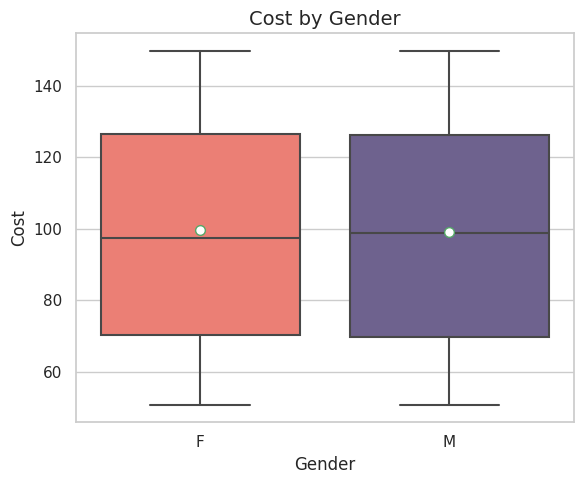

In [ ]:

colors = ["#FF6F61", "#6B5B95"]
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=df, y='cost', x='gender', showmeans=True, meanprops={"marker":"o",
                                                                       "markerfacecolor":"white",
                                                                       "markersize":"7"},
            palette=colors, ax=ax)

plt.title('Cost by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.tight_layout()
plt.show()


rata-rata biaya yang di keluarkan untuk masing-masing gender atau jenis kelamin hampir sama.

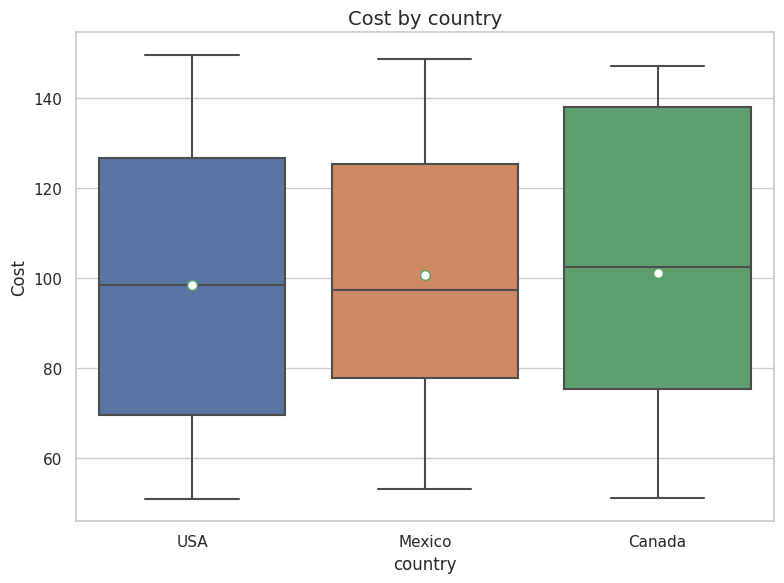

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, y='cost', x='sales_country', showmeans=True, meanprops={"marker":"o",
                                                                       "markerfacecolor":"white",
                                                                       "markersize":"7"})
plt.title('Cost by country', fontsize=14)
plt.xlabel('country', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.tight_layout()
plt.show()

rata-rata biaya yang di keluarkan untuk campaign di mexico dan canada sedikit lebih tinggi di bandingkan di amerika serikat.

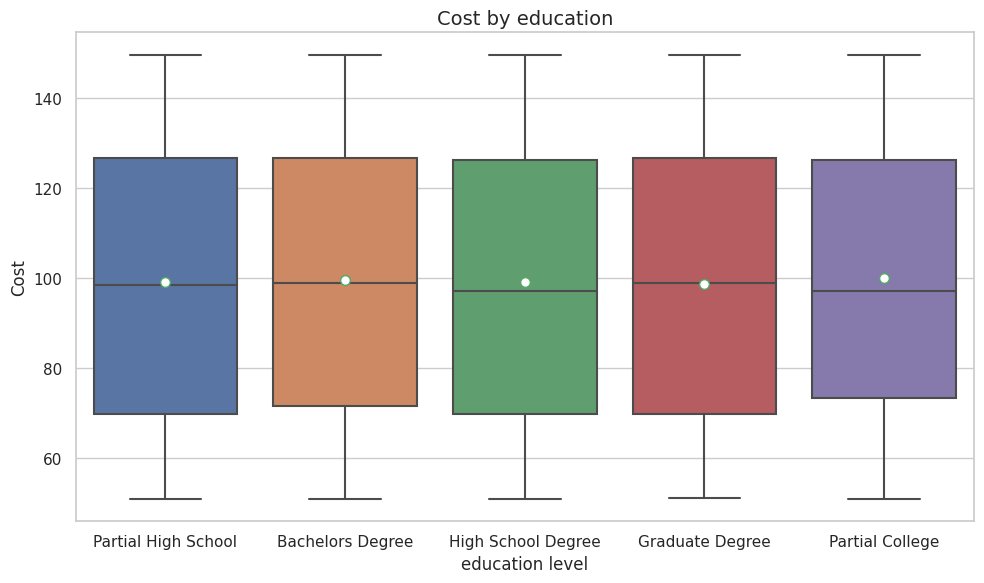

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, y='cost', x='education', showmeans=True, meanprops={"marker":"o",
                                                                       "markerfacecolor":"white",
                                                                       "markersize":"7"})
plt.title('Cost by education', fontsize=14)
plt.xlabel('education level', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.tight_layout()
plt.show()

rata-rata biaya yang di keluarkan untuk masing masing tingkat pendidikan realtif sama

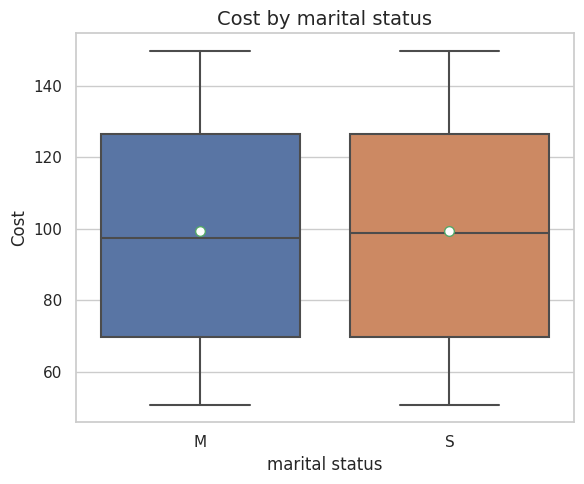

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(data=df, y='cost', x='marital_status', showmeans=True, meanprops={"marker":"o",
                                                                       "markerfacecolor":"white",
                                                                       "markersize":"7"})
plt.title('Cost by marital status', fontsize=14)
plt.xlabel('marital status', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.tight_layout()
plt.show()

rata-rata biaya yang di keluarkan antar kedua status pernikahan relatif sama

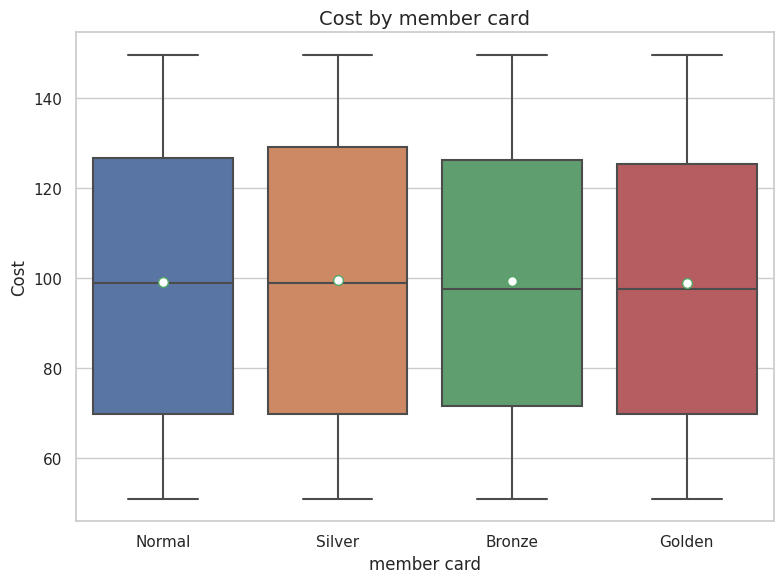

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, y='cost', x='member_card', showmeans=True, meanprops={"marker":"o",
                                                                       "markerfacecolor":"white",
                                                                       "markersize":"7"})
plt.title('Cost by member card', fontsize=14)
plt.xlabel('member card', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.tight_layout()
plt.show()

rata-rata biaya yang di keluarkan untuk campaign tiap member card juga relatif sama.

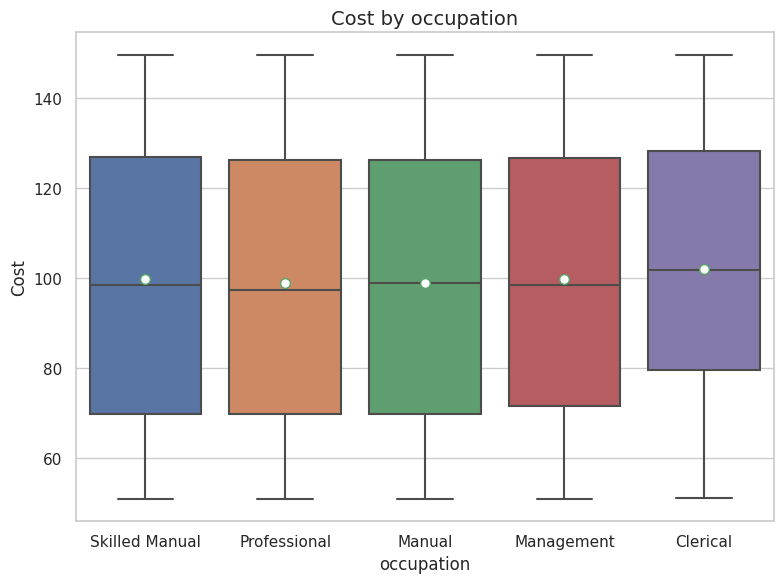

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, y='cost', x='occupation', showmeans=True, meanprops={"marker":"o",
                                                                       "markerfacecolor":"white",
                                                                       "markersize":"7"})
plt.title('Cost by occupation', fontsize=14)
plt.xlabel('occupation', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.tight_layout()
plt.show()

rata-rata biaya untuk campaign di toko yang di kelola secara clerical sedikit lebih tinggi dari pada yang lain.

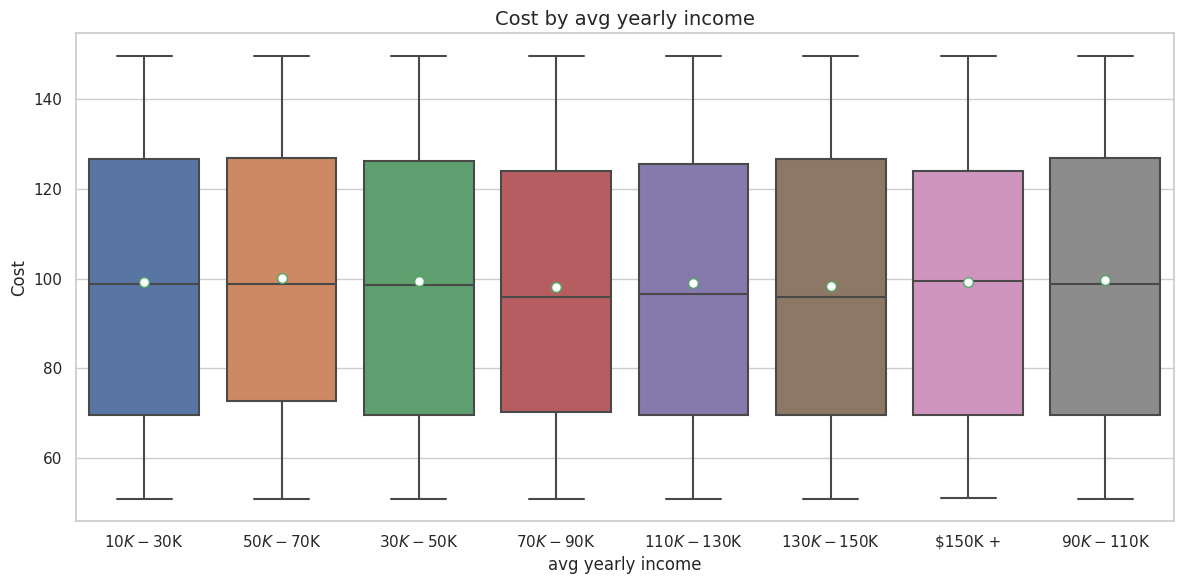

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, y='cost', x='avg. yearly_income', showmeans=True, meanprops={"marker":"o",
                                                                       "markerfacecolor":"white",
                                                                       "markersize":"7"})
plt.title('Cost by avg yearly income', fontsize=14)
plt.xlabel('avg yearly income', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.tight_layout()
plt.show()

rata-rata biaya yang di keluarkan untuk campaign untuk masing-masing pendapatan customers juga relatif sama.

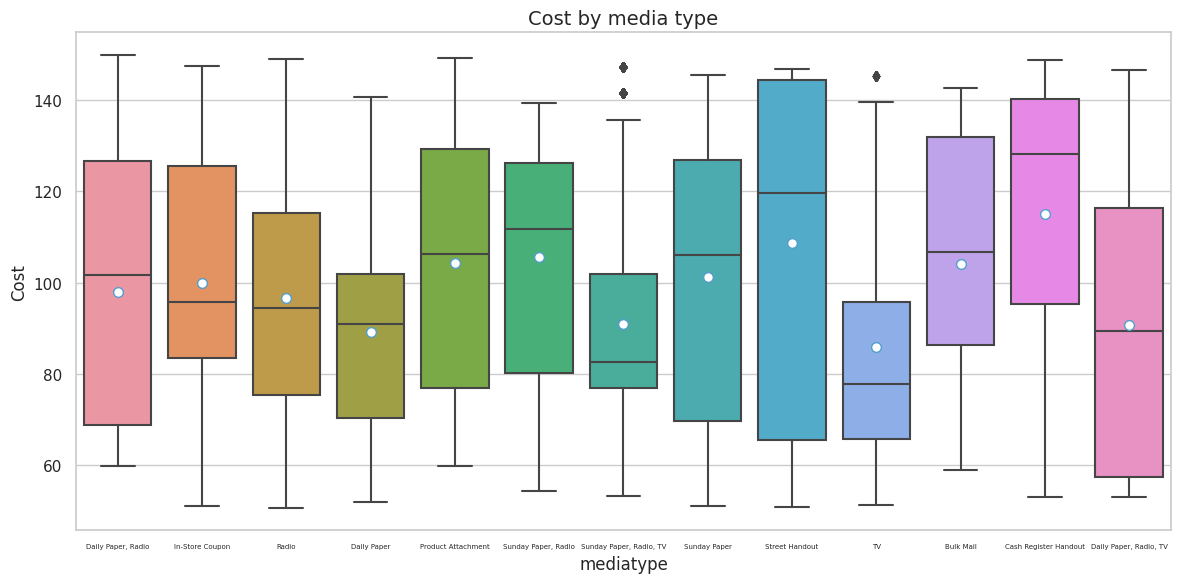

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, y='cost', x='media_type', showmeans=True, meanprops={"marker":"o",
                                                                       "markerfacecolor":"white",
                                                                       "markersize":"7"})
plt.title('Cost by media type', fontsize=14)
plt.xlabel('mediatype', fontsize=12)
plt.ylabel('Cost', fontsize=12)
ax.tick_params(axis='x', labelsize=5)
plt.tight_layout()
plt.savefig('cost_by_media.png', dpi=300)
plt.show()

rata-rata biaya campaign atau promosi pada media product attachment, sunday paper, street handout, bulk mail dan cash register handout jauh lebih tinggi di banding dengan media lainya.

In [10]:
from google.colab import files

files.download('cost_by_media.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

#### CATEGORICAL DATA SUMMARY
- rata-rata Biaya promosi masing-masing produk realtif sama tiap kategori dalam data

### NUMERICAL DATA

In [12]:
dfnum =  df.select_dtypes(include = ['int', 'float'])

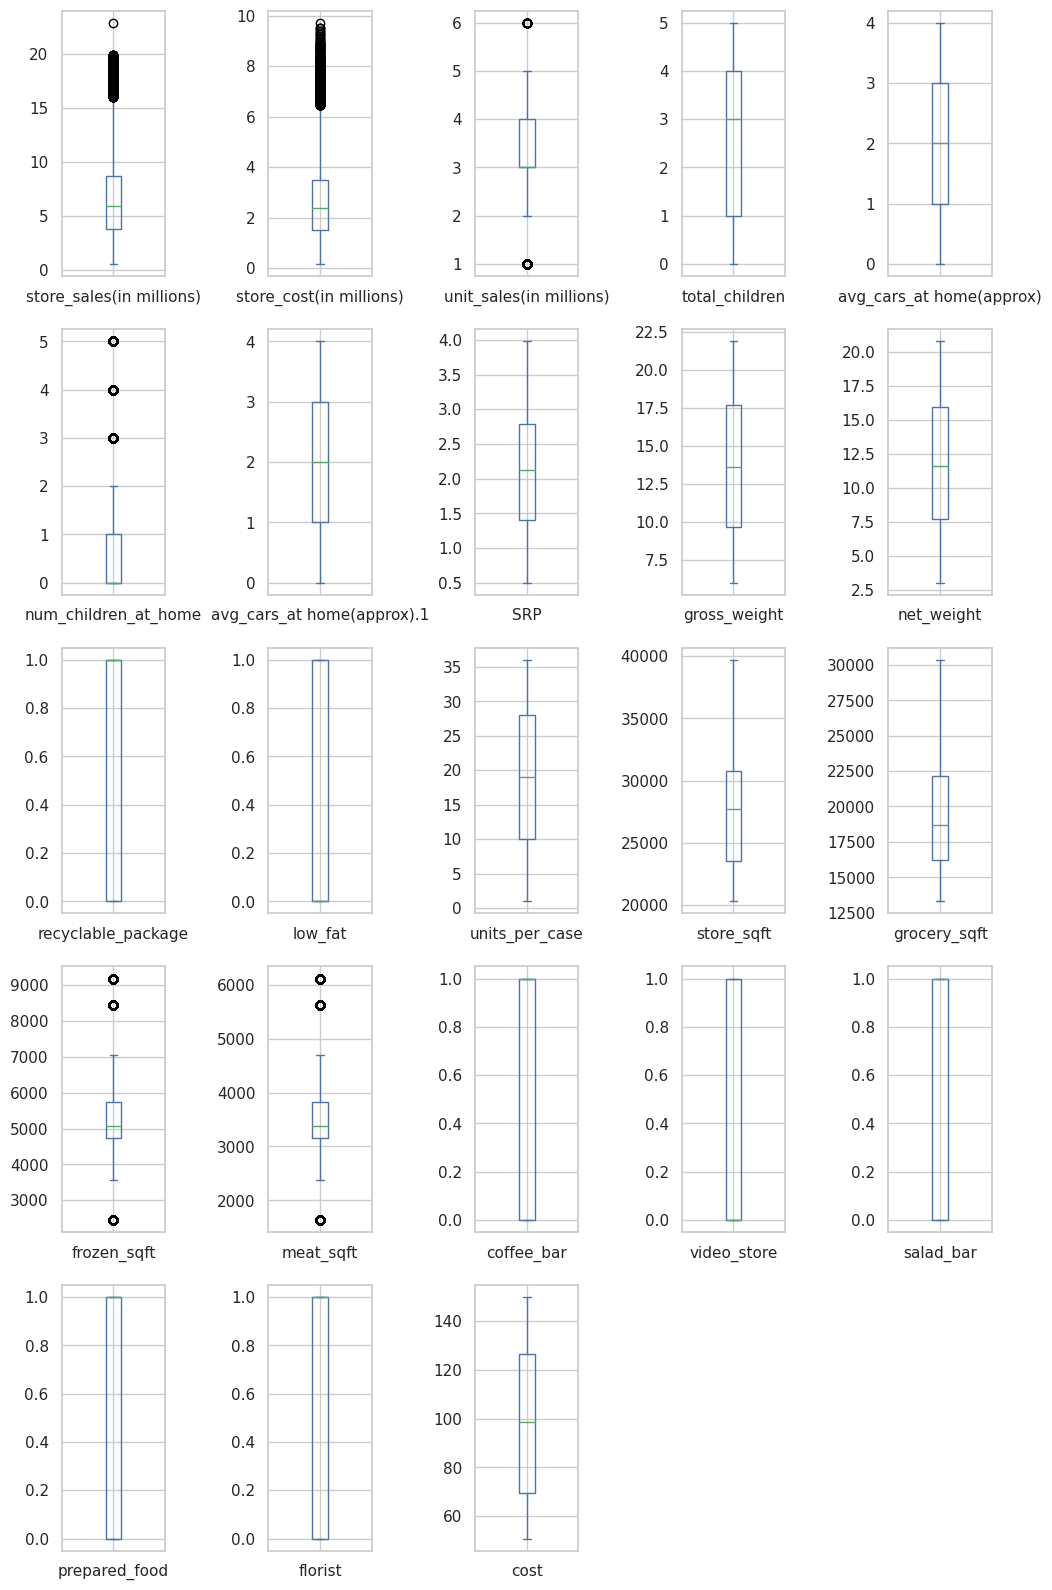

In [ ]:
dfnum.plot(subplots = True, layout = (5,5), kind = 'box', figsize = (12,20))
plt.subplots_adjust(wspace = 1);

terdapat beberapa data yang memiliki outlier

In [ ]:
df = df[df['store_sales(in millions)']<15].reset_index(drop=True)
df = df[df['store_cost(in millions)']<6].reset_index(drop=True)

##### PENGECEKAN ULANG OUTLIERS

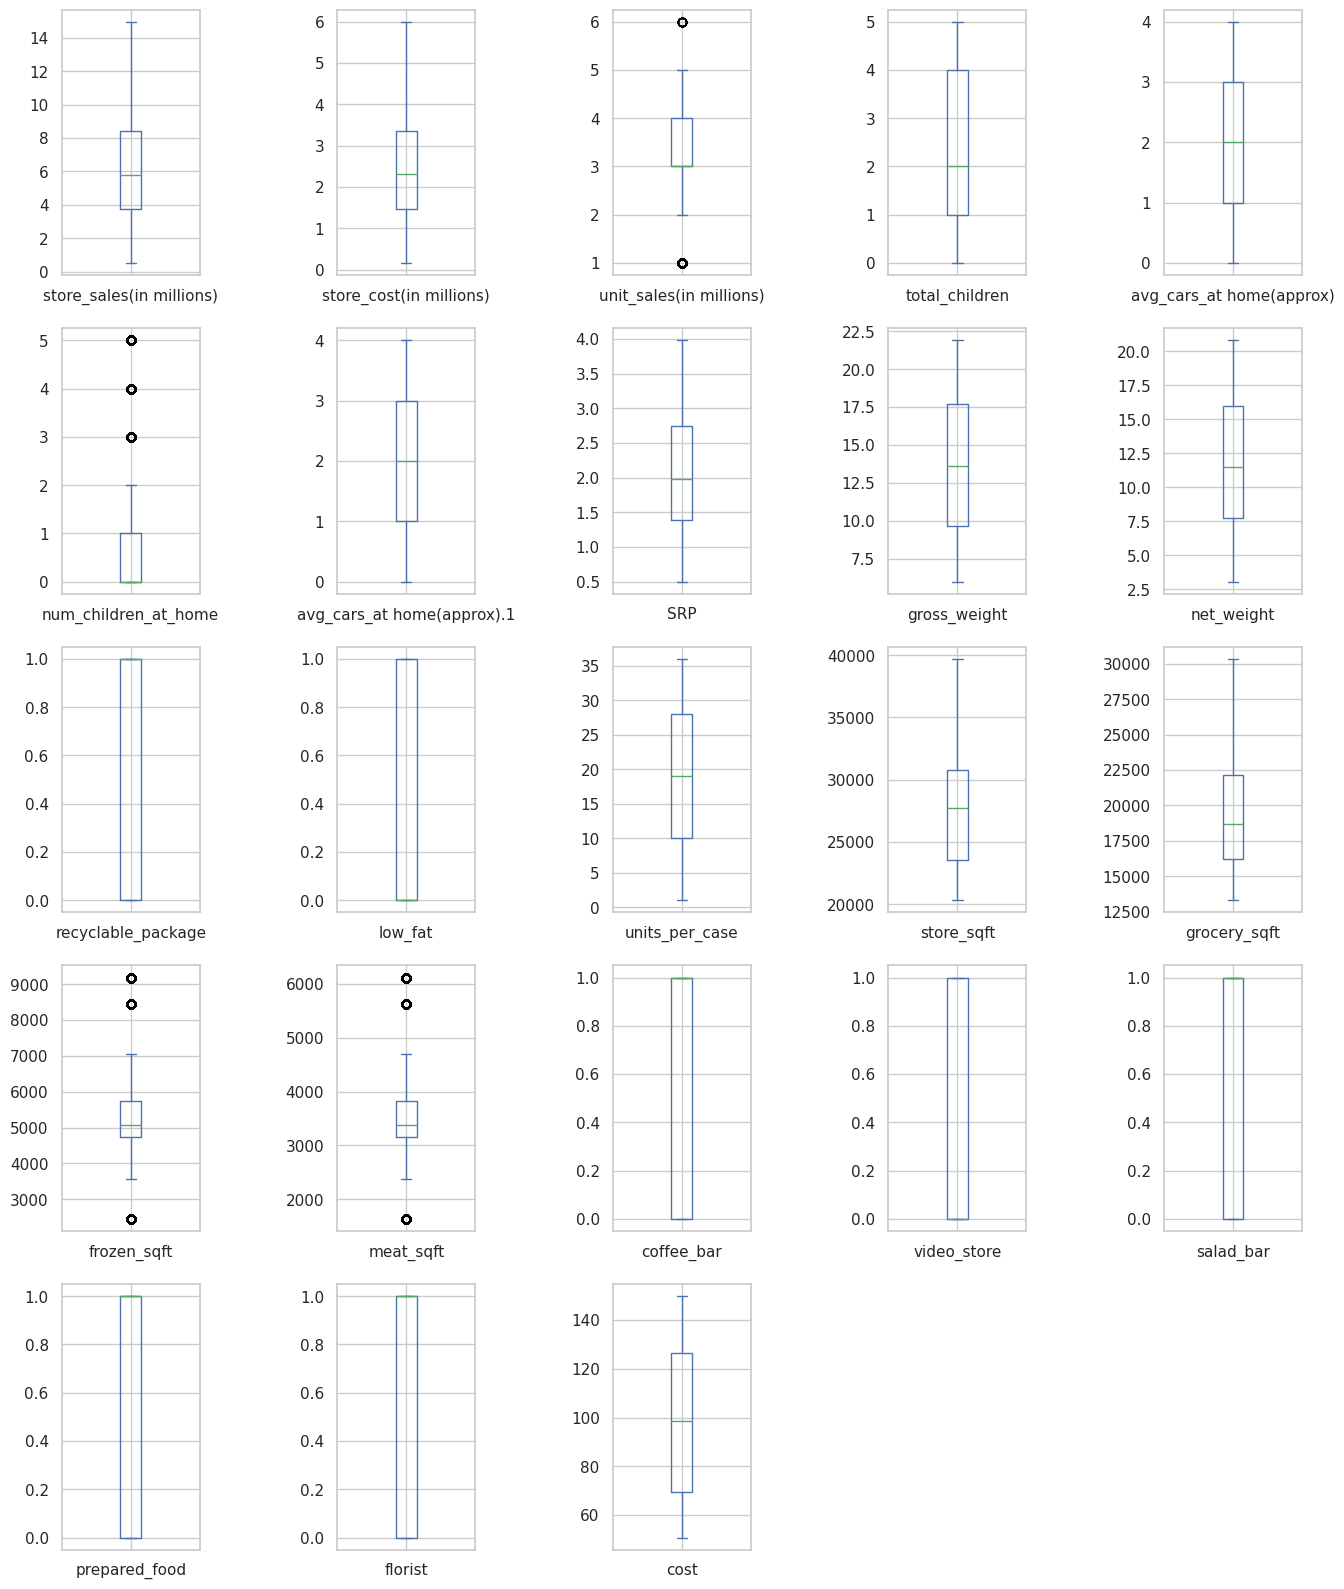

In [ ]:
dfnum =  df.select_dtypes(include = ['int', 'float'])

dfnum.plot(subplots = True, layout = (5,5), kind = 'box', figsize = (16,20))
plt.subplots_adjust(wspace = 1);

In [ ]:
df.shape

(58461, 40)

##### DISTRIBUSI DATA

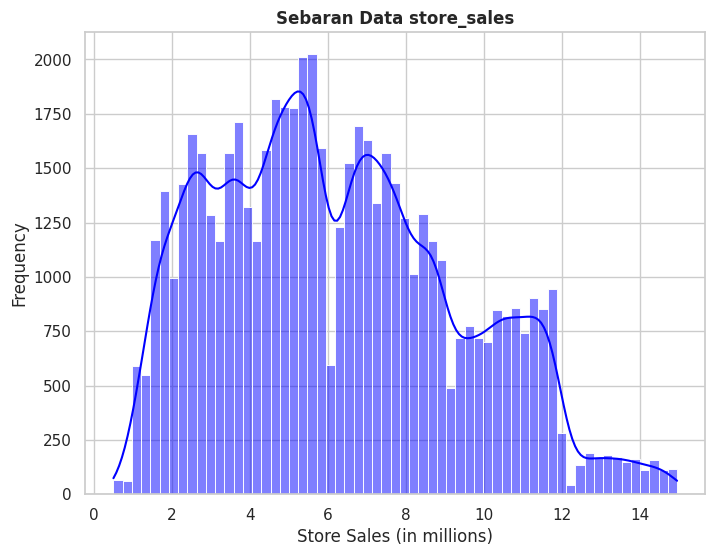

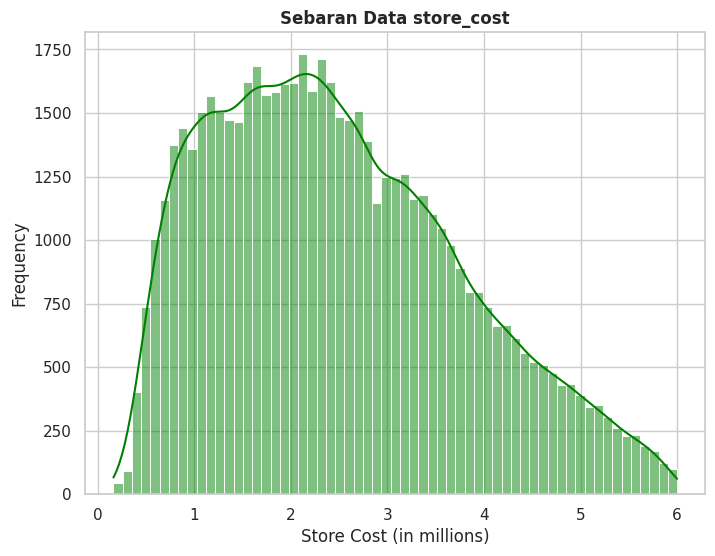

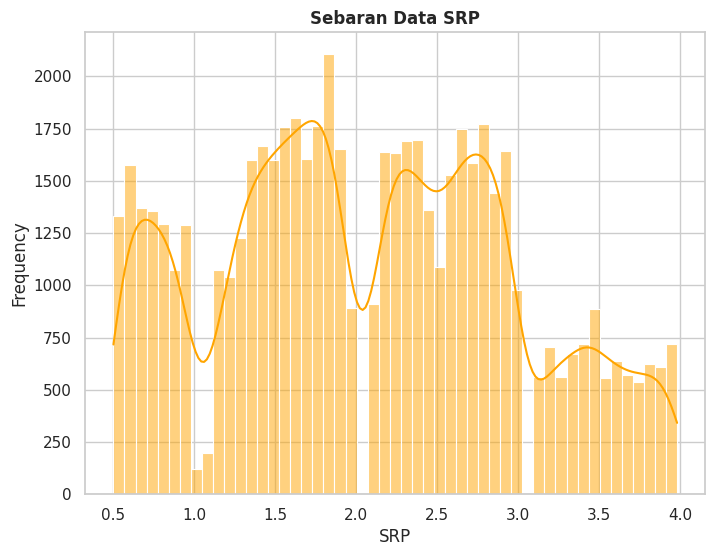

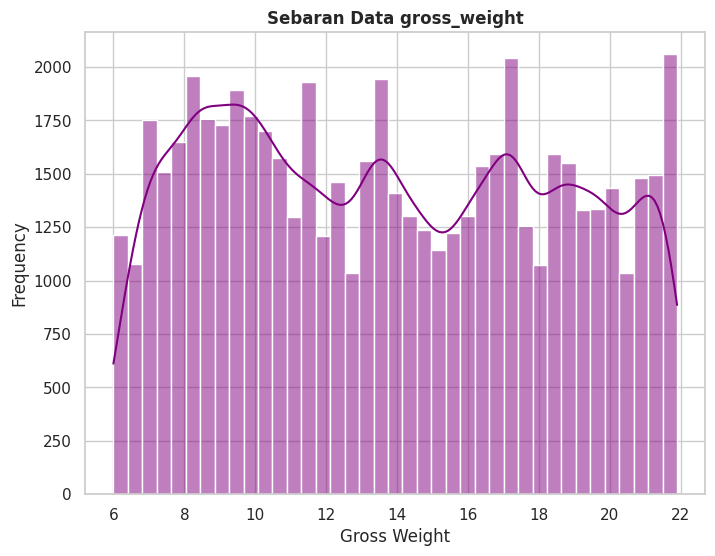

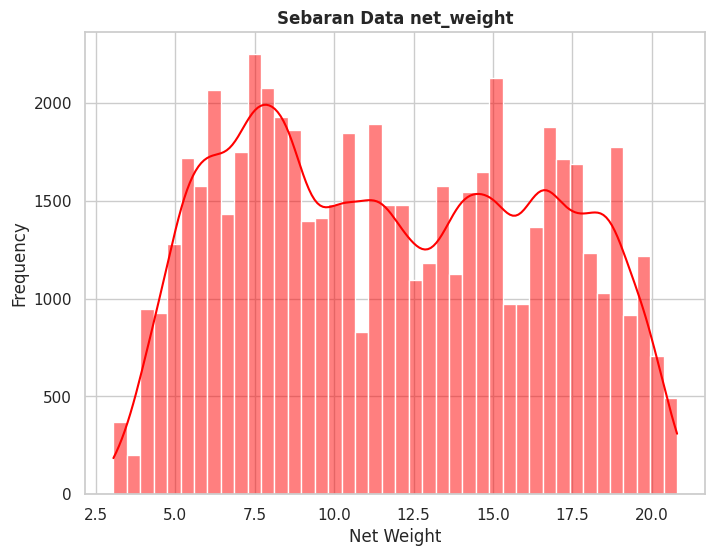

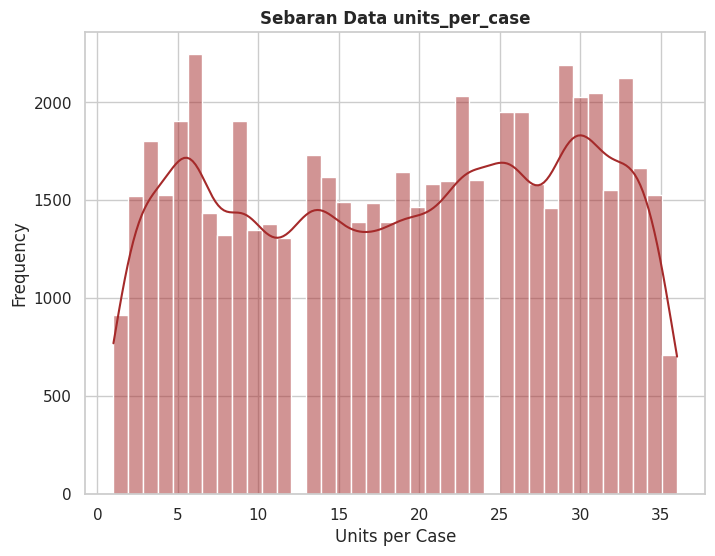

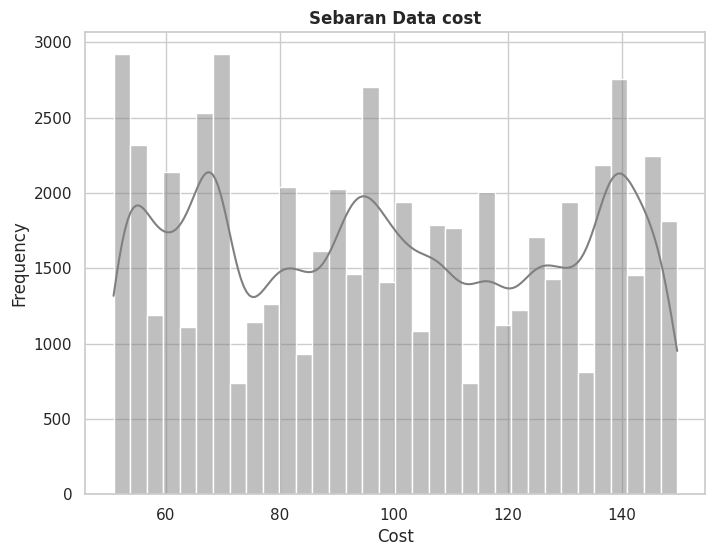

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='store_sales(in millions)', kde=True, color='blue')
plt.title('Sebaran Data store_sales', fontweight='bold')
plt.xlabel('Store Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='store_cost(in millions)', kde=True, color='green')
plt.title('Sebaran Data store_cost', fontweight='bold')
plt.xlabel('Store Cost (in millions)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='SRP', kde=True, color='orange')
plt.title('Sebaran Data SRP', fontweight='bold')
plt.xlabel('SRP')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='gross_weight', kde=True, color='purple')
plt.title('Sebaran Data gross_weight', fontweight='bold')
plt.xlabel('Gross Weight')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='net_weight', kde=True, color='red')
plt.title('Sebaran Data net_weight', fontweight='bold')
plt.xlabel('Net Weight')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='units_per_case', kde=True, color='brown')
plt.title('Sebaran Data units_per_case', fontweight='bold')
plt.xlabel('Units per Case')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='cost', kde=True, color='gray')
plt.title('Sebaran Data cost', fontweight='bold')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()


tidak terdapat distribusi yang tidak masuk akal pada data

##### CORRELATION MATRIX

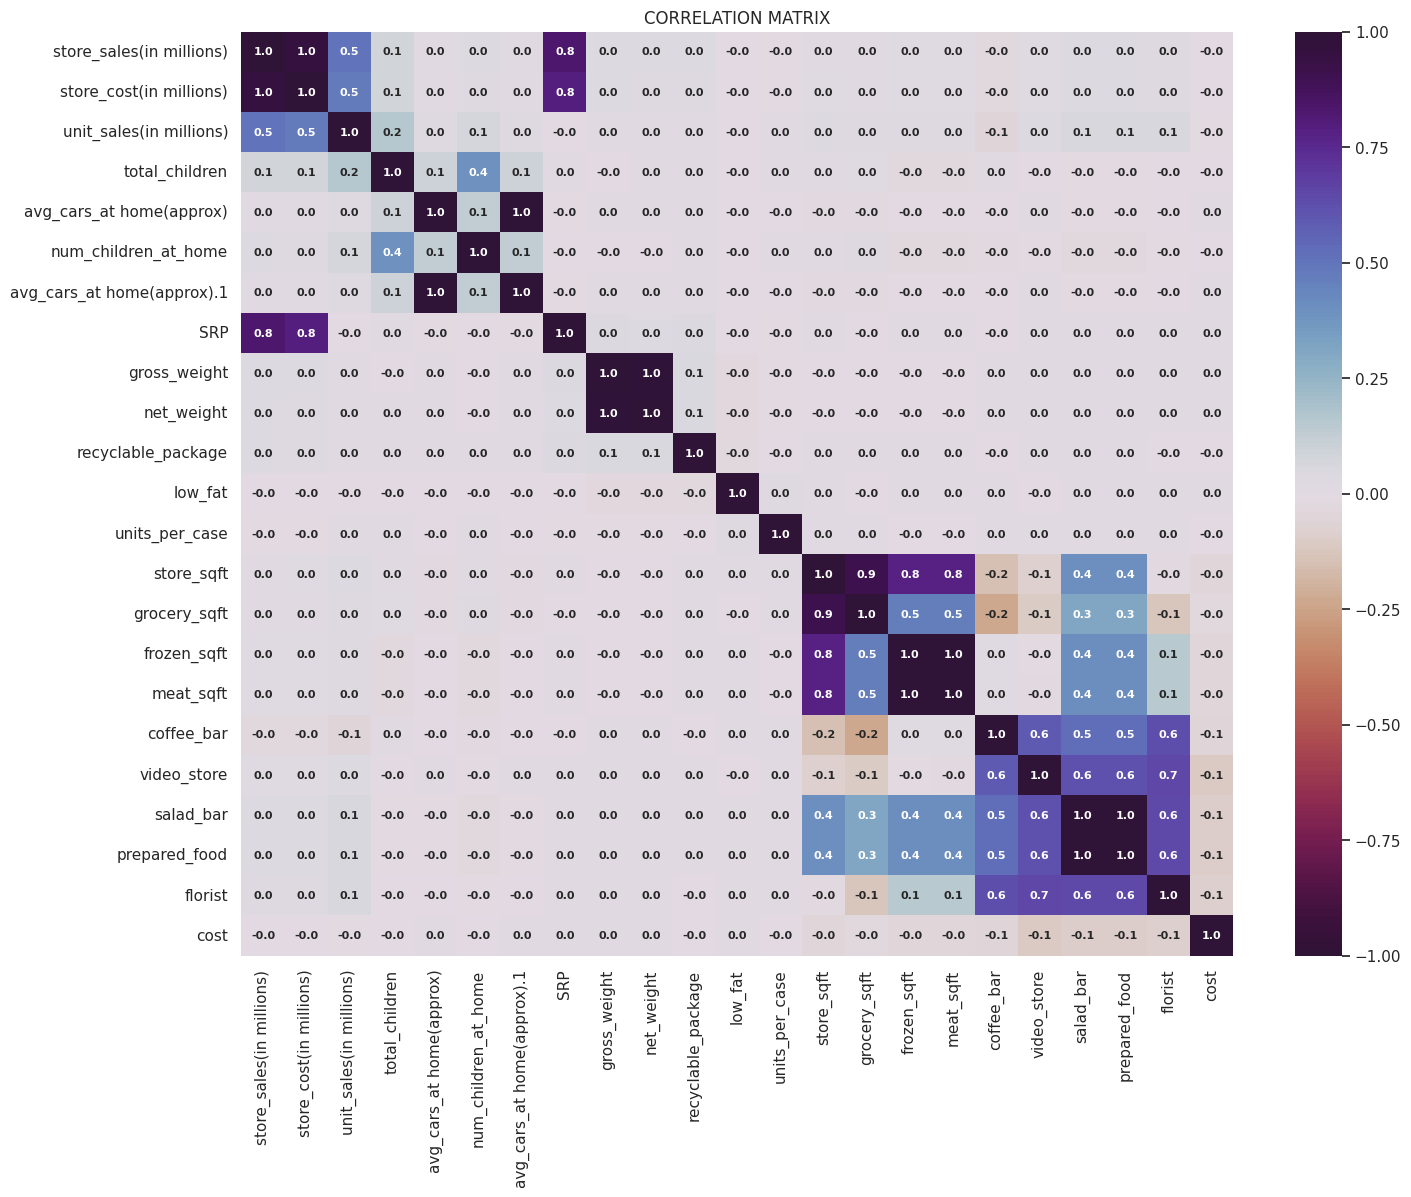

In [13]:
plt.figure(figsize=(16, 12))
sns.heatmap(dfnum.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap='twilight_shifted_r',
            annot=True,
            fmt='.1f',
            annot_kws=dict(size=8, weight='bold'),
            linecolor='black')
plt.title('CORRELATION MATRIX')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.grid(color='white', linestyle='-', linewidth=1)
plt.savefig('corr_matrix.png', dpi=300)
plt.show()

- features yang memiliki hubungan yang kuat adalah feature yang memiliki angka korelasi di atas 0.6 dan di bawah -0.6 atau yang memiliki warna gelap.
- terdapat kelompok data yang mengalami gejala multikol
- fitur yang mengalami multikol sementara tidak akan di hapus

In [14]:
files.download('corr_matrix.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## DATA PROCESSING

#### FEATURE ENGINEERING


#### mengubah data categoric menjadi numerik


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58461 entries, 0 to 58460
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               58461 non-null  object 
 1   food_department             58461 non-null  object 
 2   food_family                 58461 non-null  object 
 3   store_sales(in millions)    58461 non-null  float64
 4   store_cost(in millions)     58461 non-null  float64
 5   unit_sales(in millions)     58461 non-null  float64
 6   promotion_name              58461 non-null  object 
 7   sales_country               58461 non-null  object 
 8   marital_status              58461 non-null  object 
 9   gender                      58461 non-null  object 
 10  total_children              58461 non-null  float64
 11  education                   58461 non-null  object 
 12  member_card                 58461 non-null  object 
 13  occupation                  584

#### FEATURES SELECTION

#### ANOVA TEST

In [ ]:
import scipy.stats as stats

categorical_features = df.select_dtypes(include='object').columns
for feature in categorical_features:
    groups = []
    for value in df[feature].unique():
        groups.append(df[df[feature] == value]['cost'])
    f, p = stats.f_oneway(*groups)
    print(f"Feature: {feature} \nF-value: {f} \nP-value: {p} \n")

Feature: food_category 
F-value: 1.0516911730383196 
P-value: 0.3786356223205494 

Feature: food_department 
F-value: 0.6541717809252454 
P-value: 0.8805786893671113 

Feature: food_family 
F-value: 1.0784954674966996 
P-value: 0.34011360979188454 

Feature: promotion_name 
F-value: 438.5610503624013 
P-value: 0.0 

Feature: sales_country 
F-value: 44.48088188963779 
P-value: 4.976024699131362e-20 

Feature: marital_status 
F-value: 0.002337052211722043 
P-value: 0.9614429966258902 

Feature: gender 
F-value: 5.009712126462095 
P-value: 0.025209247644647235 

Feature: education 
F-value: 1.4623458473628004 
P-value: 0.21069743329449322 

Feature: member_card 
F-value: 0.8965793072051086 
P-value: 0.4419806724988232 

Feature: occupation 
F-value: 5.751416939346423 
P-value: 0.0001265367669747533 

Feature: houseowner 
F-value: 0.5827830385273343 
P-value: 0.44522660233282685 

Feature: avg. yearly_income 
F-value: 3.3685792524267466 
P-value: 0.0013520332212950043 

Feature: brand_name

penggunaan ANOVA test dapat di manfaatkan untuk menseleksi feature kategorik yang tidak memiliki pengaruh terhadap variabel target yaitu cost.

P-value di gunakan untuk melihat seberapa besar pengaruh variabel feature terhadap variabel target, semakin besar nilai F maka akan semakin mempengaruhi. sedangkan nilai P-value di gunakan untuk mengukur probabilitas perbedaan yang di amati pada X dan Y pada data kategori hanyalah kebetulan. P-value yang lebih rendah menunjukan probabilitas yang kecil dan hubungan X dan Y signifikan.

feature kategori dengan P-value di atas 0,05 dan nilai F-value mendekati 1 akan di buang

In [ ]:
drop_feat = ['food_category', 'food_department', 'food_family', 'education', 'sales_country', 'marital_status', 'marital_status', 'member_card', 'houseowner', 'brand_name', 'store_type', 'store_state']

df.drop(columns=drop_feat, inplace=True)


##### ORDINAL ENCODING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58461 entries, 0 to 58460
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   store_sales(in millions)    58461 non-null  float64
 1   store_cost(in millions)     58461 non-null  float64
 2   unit_sales(in millions)     58461 non-null  float64
 3   promotion_name              58461 non-null  object 
 4   gender                      58461 non-null  object 
 5   total_children              58461 non-null  float64
 6   occupation                  58461 non-null  object 
 7   avg_cars_at home(approx)    58461 non-null  float64
 8   avg. yearly_income          58461 non-null  object 
 9   num_children_at_home        58461 non-null  float64
 10  avg_cars_at home(approx).1  58461 non-null  float64
 11  SRP                         58461 non-null  float64
 12  gross_weight                58461 non-null  float64
 13  net_weight                  584

In [ ]:
## mengubah column gender menjadi numerik
gender = {'F': 0, 'M': 1}
df['gender'] = df['gender'].map(gender)

## mengubah column occupation menjadi numerik
occupation = {'Manual': 1, 'Skilled Manual': 2, 'Clerical': 3, 'Professional': 4, 'Management': 5 }
df['occupation'] = df['occupation'].map(occupation)


#### ONE-HOT ENCODING

In [ ]:
df = pd.get_dummies(df, columns=['store_city', 'media_type', 'avg. yearly_income'], dtype=int)

In [ ]:
df = pd.get_dummies(df, columns=['promotion_name'], dtype=int)

In [ ]:
df.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),gender,total_children,occupation,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,...,promotion_name_Super Savers,promotion_name_Super Wallet Savers,promotion_name_Three for One,promotion_name_Tip Top Savings,promotion_name_Two Day Sale,promotion_name_Two for One,promotion_name_Unbeatable Price Savers,promotion_name_Wallet Savers,promotion_name_Weekend Markdown,promotion_name_You Save Days
0,7.36,2.7232,4.0,0,1.0,2,1.0,1.0,1.0,1.84,...,0,0,0,0,0,0,0,0,0,0
1,5.52,2.5944,3.0,1,0.0,4,4.0,0.0,4.0,1.84,...,0,0,0,0,0,0,0,0,0,0
2,3.68,1.3616,2.0,0,4.0,1,1.0,0.0,1.0,1.84,...,0,0,0,0,0,0,0,0,0,0
3,3.68,1.1776,2.0,0,2.0,1,2.0,2.0,2.0,1.84,...,0,0,0,0,0,0,0,0,0,0
4,4.08,1.4280,3.0,1,0.0,2,2.0,0.0,2.0,1.36,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58461 entries, 0 to 58460
Columns: 114 entries, store_sales(in millions) to promotion_name_You Save Days
dtypes: float64(23), int64(91)
memory usage: 50.8 MB


data telah siap untuk di lakukan modeling

In [ ]:
df.head(10)

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),gender,total_children,occupation,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,...,promotion_name_Super Savers,promotion_name_Super Wallet Savers,promotion_name_Three for One,promotion_name_Tip Top Savings,promotion_name_Two Day Sale,promotion_name_Two for One,promotion_name_Unbeatable Price Savers,promotion_name_Wallet Savers,promotion_name_Weekend Markdown,promotion_name_You Save Days
0,7.36,2.7232,4.0,0,1.0,2,1.0,1.0,1.0,1.84,...,0,0,0,0,0,0,0,0,0,0
1,5.52,2.5944,3.0,1,0.0,4,4.0,0.0,4.0,1.84,...,0,0,0,0,0,0,0,0,0,0
2,3.68,1.3616,2.0,0,4.0,1,1.0,0.0,1.0,1.84,...,0,0,0,0,0,0,0,0,0,0
3,3.68,1.1776,2.0,0,2.0,1,2.0,2.0,2.0,1.84,...,0,0,0,0,0,0,0,0,0,0
4,4.08,1.4280,3.0,1,0.0,2,2.0,0.0,2.0,1.36,...,0,0,0,0,0,0,0,0,0,0
5,4.08,1.4688,3.0,0,2.0,4,1.0,2.0,1.0,1.36,...,0,0,0,0,0,0,0,0,0,0
6,5.44,2.5568,4.0,0,4.0,2,2.0,0.0,2.0,1.36,...,0,0,0,0,0,0,0,0,0,0
7,3.74,1.6082,2.0,1,1.0,1,4.0,0.0,4.0,1.87,...,0,0,0,0,0,0,0,0,0,0
8,4.08,1.4688,3.0,0,2.0,2,2.0,0.0,2.0,1.36,...,0,0,0,0,0,0,0,0,0,0
9,9.72,4.5684,3.0,0,3.0,4,1.0,0.0,1.0,3.24,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#### SPLIT DATA

In [ ]:
from sklearn.model_selection import train_test_split

dfmodel = df

X_train, X_test, y_train, y_test = train_test_split(dfmodel.drop('cost', axis=1), dfmodel['cost'], test_size=0.2, random_state=42)

In [ ]:
print("data yang akan di gunakan untuk training model sebanyak :", X_train.shape)
print("data yang akan di gunakan untuk testing model seabanyak :", X_test.shape)

data yang akan di gunakan untuk training model sebanyak : (46768, 113)
data yang akan di gunakan untuk testing model seabanyak : (11693, 113)


## MELATIH DATA DENGAN BEBERAPA MODEL PREDIKSI (MODELING)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import make_regression

#### RIDGE REGRESSION

In [ ]:
#### melakukan standarisasi data

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()

params = {'alpha': np.logspace(-5, 5, 100)}
grid_search = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_alpha_ridge = grid_search.best_params_['alpha']
print(f"Alpha terbaik untuk regresi Ridge: {best_alpha_ridge}")

Alpha terbaik untuk regresi Ridge: 187.3817422860383


In [ ]:
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(x_train, y_train)

y_ridge_pred = ridge_best.predict(x_test)

mse_ridge = mean_squared_error(y_test, y_ridge_pred)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)

print("Score MSE:", mse_ridge)
print("Score RMSE:", rmse_ridge)
print("Score MAE:", mae_ridge)
print("Coefficient of Determination (R^2):", r2_ridge)

Score MSE: 578.6200901042691
Score RMSE: 24.054523277426828
Score MAE: 19.78145200239396
Coefficient of Determination (R^2): 0.3552937477106627


model regresi ridge tidak cukup baik untuk data yang akan di prediksi karena memiliki nilai MSE danRMSE yang tinggi dan R-squared yang rendah. nilai MSE dan RMSE yang tinggi berarti kesalahan prediksi model relatif tinggi sedangkan R-squared yang rendah berarti model kurang mampu menjelaskan sebagian besar variasi data

#### COMBINATION REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, x_train, y_train, cv=5)
print("Skor validasi silang: ", scores)

Skor validasi silang:  [0.35863797 0.34811618 0.34108277 0.35043059 0.34739468]


In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error: ", mse)
print("Score RMSE:", rmse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)

Mean Squared Error:  578.5872365869371
Score RMSE: 24.053840370862552
Mean Absolute Error:  19.7692943499147
R-squared:  0.3553303535395923


In [ ]:
## hyperparameter tuning

from sklearn.linear_model import RidgeCV, LassoCV

ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression")
print("Mean Squared Error: ", mse_ridge)
print("Score RMSE:", rmse)
print("Mean Absolute Error: ", mae_ridge)
print("R-squared: ", r2_ridge)


Ridge Regression
Mean Squared Error:  578.6765249770258
Score RMSE: 24.055696310375758
Mean Absolute Error:  19.774493535464817
R-squared:  0.3552308672197575


In [ ]:
lasso = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression")
print("Mean Squared Error: ", mse_lasso)
print("Score RMSE:", rmse)
print("Mean Absolute Error: ", mae_lasso)
print("R-squared: ", r2_lasso)


Lasso Regression
Mean Squared Error:  84667975.19286218
Score RMSE: 9201.520265307368
Mean Absolute Error:  8824.970462847978
R-squared:  -94337.19168926576


untuk hasil regresi yang mengcombinasikan linear regression dengan ridge dan lasso regression kurang baik untuk sebuah model prediksi.

#### CATBOST REGRESSION

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### CATBOOST REGRESSOR

In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(random_state=42, verbose=0)
model.fit(X_train, y_train)

In [ ]:
model = CatBoostRegressor()
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
}

grid_search = GridSearchCV(model, param_grid,
scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

0:	learn: 29.4389507	total: 24.3ms	remaining: 7.28s
1:	learn: 28.8322923	total: 41.9ms	remaining: 6.25s
2:	learn: 28.3711108	total: 64.4ms	remaining: 6.38s
3:	learn: 27.9223312	total: 82.2ms	remaining: 6.08s
4:	learn: 27.5305227	total: 99.6ms	remaining: 5.88s
5:	learn: 27.1112654	total: 132ms	remaining: 6.48s
6:	learn: 26.6728903	total: 150ms	remaining: 6.26s
7:	learn: 26.2075372	total: 169ms	remaining: 6.18s
8:	learn: 25.7637847	total: 187ms	remaining: 6.03s
9:	learn: 25.3692993	total: 204ms	remaining: 5.91s
10:	learn: 24.9880365	total: 222ms	remaining: 5.84s
11:	learn: 24.6685294	total: 245ms	remaining: 5.89s
12:	learn: 24.2747331	total: 265ms	remaining: 5.84s
13:	learn: 23.9675678	total: 281ms	remaining: 5.75s
14:	learn: 23.6771501	total: 299ms	remaining: 5.68s
15:	learn: 23.3342135	total: 316ms	remaining: 5.62s
16:	learn: 23.0719290	total: 333ms	remaining: 5.55s
17:	learn: 22.8068228	total: 350ms	remaining: 5.48s
18:	learn: 22.5417369	total: 367ms	remaining: 5.43s
19:	learn: 22.295

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error: ", mse)
print("Score RMSE:", rmse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)

Mean Squared Error:  4.118313010707023
Score RMSE: 2.029362710484999
Mean Absolute Error:  1.301885013614869
R-squared:  0.9954113204980337


##### CROSS VALIDATION CATBOOST

In [ ]:
## melakukan cross calidation

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5,
scoring='neg_mean_squared_error')
cv_scores = -cv_scores
print("Cross Validation MSE:", cv_scores)
print("Rata-rata MSE:", cv_scores.mean())
print("Standard Deviasi mse:", cv_scores.std())

0:	learn: 29.4971977	total: 17ms	remaining: 5.07s
1:	learn: 28.9886696	total: 33.2ms	remaining: 4.95s
2:	learn: 28.5218134	total: 48ms	remaining: 4.75s
3:	learn: 28.0887440	total: 63.2ms	remaining: 4.68s
4:	learn: 27.6876556	total: 79.1ms	remaining: 4.67s
5:	learn: 27.2108420	total: 93.9ms	remaining: 4.6s
6:	learn: 26.7067928	total: 118ms	remaining: 4.95s
7:	learn: 26.3376548	total: 135ms	remaining: 4.93s
8:	learn: 26.0133996	total: 151ms	remaining: 4.89s
9:	learn: 25.6597058	total: 167ms	remaining: 4.85s
10:	learn: 25.1239391	total: 183ms	remaining: 4.81s
11:	learn: 24.7841716	total: 218ms	remaining: 5.23s
12:	learn: 24.5361250	total: 235ms	remaining: 5.18s
13:	learn: 24.1465870	total: 251ms	remaining: 5.12s
14:	learn: 23.8248549	total: 265ms	remaining: 5.04s
15:	learn: 23.5887357	total: 280ms	remaining: 4.98s
16:	learn: 23.2305947	total: 297ms	remaining: 4.94s
17:	learn: 22.8385896	total: 314ms	remaining: 4.92s
18:	learn: 22.5833014	total: 329ms	remaining: 4.86s
19:	learn: 22.3314426

hasil peltihan dari catboost regression dapat di katakan sangat baik dengan nilai mean squared error(MSE) dan RMSE serta mean absolute error(MAE) yang cukup rendah hal ini menandakan kesalahan prediski yang sangat rendah. semakin kecil MAE maka semakin baik model dalam memprediksi data dengan akurasi yang tinggi, sedangkan makin kecil MSE dan RMSE maka semakin dekat nilai prediksi dengan nilai sebenarnya. nilai R-squared yang tinggi berarti model mampu menjelaskan sebagian besar variasi data

Root mean squred error sebesar 2.029 yang berarti selisih rata-rata data yang di prediksi dengan data real sebesar 2.029. pada kasus ini kita ingin memprediksi cost untuk setiap media campaign, berarti rata-rata selisih antara data yang di prediksi dan data real/data asli sebesar 2,02 dollar.

dengan nilai R-squared 0.99 yang berarti 99.9 persen variabilitas variabel dependen dapat di jelaskanm oleh variabel independen dalam model regresi.

dengan hasil RMSE validasi silang sebesar 2.162 yang berarti setelah model di validasi silang maka selisih rata-rata data prediksi terhadap data asli adalah 2,16 dollar



In [ ]:
X = dfmodel.drop('cost', axis=1)

In [ ]:
fi = best_model.feature_importances_

sorted_idx = fi.argsort()[::-1]

fi = pd.DataFrame({'feature': X_train.columns[sorted_idx], 'importance': fi[sorted_idx]})
fi.head(20)

,feature,importance
0,grocery_sqft,4.822908
1,meat_sqft,4.732239
2,frozen_sqft,4.624517
3,media_type_Cash Register Handout,4.014236
4,store_sqft,4.009328
5,promotion_name_Super Savers,3.291370
6,"media_type_Sunday Paper, Radio",2.824596
7,"media_type_Daily Paper, Radio, TV",2.617820
8,promotion_name_Weekend Markdown,2.605796
9,promotion_name_Save-It Sale,2.284246


#### RANDOM FOREST REGRESSION

In [ ]:
from sklearn.ensemble import RandomForestRegressor


HYPERPARAMETER

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

In [ ]:
randomfrst = RandomForestRegressor(n_estimators=100, random_state=42)
randomfrst.fit(X_train, y_train)

y_pred = randomfrst.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error: ", mse)
print("Score RMSE:", rmse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)

Mean Squared Error:  0.730920303685113
Score RMSE: 0.8549387718925332
Mean Absolute Error:  0.05627673821961123
R-squared:  0.9991855988103937


#### VALIDASI SILANG RANDOM FOREST REGRESSION

In [ ]:
## melakukan cross calidation

cv_scores = cross_val_score(randomfrst, X_train, y_train, cv=5,
scoring='neg_mean_squared_error')
cv_scores = -cv_scores
print("Cross Validation MSE:", cv_scores)
print("Rata-rata MSE:", cv_scores.mean())
print("Standard Deviasi mse:", cv_scores.std())

Cross Validation MSE: [1.58086502 1.52050131 1.44433082 1.27591084 1.37485035]
Rata-rata MSE: 1.439291667403118
Standard Deviasi mse: 0.10724681228575951


In [ ]:
rmse = np.sqrt(cv_scores.mean())
print("skor RMSE validasi silang sebesar :", rmse)

skor RMSE validasi silang sebesar : 1.1997048251145437


###### FEATURED IMPORTENCE RANDOM FOREST REGRESSION

In [ ]:
fi = randomfrst.feature_importances_

sorted_idx = fi.argsort()[::-1]

fi = pd.DataFrame({'feature': X_train.columns[sorted_idx], 'importance': fi[sorted_idx]})
fi.head(15)

,feature,importance
0,grocery_sqft,0.044814
1,meat_sqft,0.033052
2,frozen_sqft,0.031750
3,promotion_name_Price Slashers,0.027907
4,"media_type_Sunday Paper, Radio",0.026463
5,promotion_name_Weekend Markdown,0.026253
6,promotion_name_Big Time Discounts,0.026236
7,media_type_Cash Register Handout,0.025790
8,store_sqft,0.024567
9,promotion_name_Free For All,0.024220


hasil pealtihan dari random forrest regression dapat di katakan sangat baik bahkan lebih baik dari catboost regression untuk data latih dan data training dengan nilai mean squared error(MSE) dan RMSE serta mean absolute erroe(MAE) yang cukup rendah hal ini menandakan kesalahan prediski yang sangat rendah. semakin kecil MAE maka semakin baik model dalam memprediksi data dengan akurasi yang tinggi, sedangkan makin kecil MSE dan RMSE maka semakin dekat nilai prediksi dengan nilai sebenarnya. nilai R-squared yang tinggi berarti model mampu menjelaskan sebagian besar variasi data

Root mean squred error sebesar 0.056 yang berarti selisih rata-rata data yang di prediksi dengan data real sebesar 0.056. pada kasus ini kita ingin memprediksi cost untuk setiap media campaign, berarti rata-rata selisih antara data yang di prediksi dan data real/data asli sebesar 0,056 dollar.

dengan nilai R-squared 0.99 yang berarti 99.9 persen variabilitas variabel dependen dapat di jelaskanm oleh variabel independen dalam model regresi.

dengan hasil RMSE validasi silang sebesar 1.199 yang berarti setelah model di validasi silang maka selisih rata-rata data prediksi terhadap data asli adalah 1,19 dollar

#####  MENYIMPAN MODEL PELATIHAN

In [ ]:
from joblib import dump, load

dump(randomfrst, 'foodmart_randomforest.joblib')

['foodmart_randomforest.joblib']

In [ ]:
from google.colab import files

files.download('foodmart_randomforest.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dump(best_model, 'foodmart_catboost.joblib')

['foodmart_catboost.joblib']

In [ ]:
files.download('foodmart_catboost.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## MELAKUKAN PREDIKSI COST/ANGGARAN CAMPAIGN DARI DATA BARU MENGGUNAKAN RANDOM FOREST REGRESOR MODEL YANG SUDAH DI LATIH

In [ ]:
cost_predict = pd.read_excel('/content/drive/MyDrive/datasets/cost_prediction1.xlsx')

In [ ]:
## melihat data yang akan di prediksi

cost_predict.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),gender,total_children,occupation,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,...,promotion_name_Super Savers,promotion_name_Super Wallet Savers,promotion_name_Three for One,promotion_name_Tip Top Savings,promotion_name_Two Day Sale,promotion_name_Two for One,promotion_name_Unbeatable Price Savers,promotion_name_Wallet Savers,promotion_name_Weekend Markdown,promotion_name_You Save Days
0,5.37,2.3628,3,1,2,1,1,2,1,1.79,...,0,0,0,0,0,0,0,0,0,0
1,6.63,2.9835,3,1,2,2,2,3,2,2.21,...,0,0,0,0,0,0,0,0,0,0
2,8.94,4.2018,3,1,1,4,1,2,1,2.98,...,0,0,0,0,0,0,0,0,0,0
3,4.52,2.1244,4,1,0,4,4,3,4,1.13,...,1,0,0,0,0,0,0,0,0,0
4,5.84,2.3944,4,0,0,1,0,4,0,1.46,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cost_predict.shape


(25, 113)

ada 25 data baru yang akan coba di prediksi oleh model

In [ ]:
import joblib

In [ ]:
## memanggil model random forest regressor

upload1 = files.upload()

Saving foodmart_randomforest.joblib to foodmart_randomforest (2).joblib


In [ ]:
randomforest = joblib.load('foodmart_randomforest.joblib')

In [ ]:
predict = randomforest.predict(cost_predict)

In [ ]:
cost_predict['prediction_cost'] = predict

### HASIL PREDIKSI

In [ ]:
prediction_cost = cost_predict.pop("prediction_cost")

cost_predict.insert(0, "prediction_cost", prediction_cost)
cost_predict

,prediction_cost,store_sales(in millions),store_cost(in millions),unit_sales(in millions),gender,total_children,occupation,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,...,promotion_name_Super Savers,promotion_name_Super Wallet Savers,promotion_name_Three for One,promotion_name_Tip Top Savings,promotion_name_Two Day Sale,promotion_name_Two for One,promotion_name_Unbeatable Price Savers,promotion_name_Wallet Savers,promotion_name_Weekend Markdown,promotion_name_You Save Days
0,75.2222,5.37,2.3628,3,1,2,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,122.6642,6.63,2.9835,3,1,2,2,2,3,2,...,0,0,0,0,0,0,0,0,0,0
2,79.2418,8.94,4.2018,3,1,1,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
3,118.6542,4.52,2.1244,4,1,0,4,4,3,4,...,1,0,0,0,0,0,0,0,0,0
4,77.2400,5.84,2.3944,4,0,0,1,0,4,0,...,0,0,0,0,0,0,0,0,0,0
5,98.9926,11.94,4.4178,3,1,0,5,4,2,4,...,1,0,0,0,0,0,0,0,0,0
6,97.4736,9.84,3.0504,4,0,2,4,3,3,3,...,0,0,0,0,0,0,0,0,0,0
7,77.0100,6.51,3.1899,3,1,3,4,5,3,5,...,0,0,0,0,0,0,0,0,0,0
8,88.7473,2.34,0.8658,2,0,0,4,2,1,2,...,0,0,0,0,0,0,0,0,0,0
9,77.8081,5.13,1.8468,3,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


tabel di atas merupakan hasil prediksi dari data baru yang sudah di buat. column prediction_cost merupakan hasil prediksi dari model yang sudah di buat sebelumnya yaitu model random forest regresion

In [ ]:
# menyimpan tabel hasil prediksi ke scv

cost_predict.to_csv('foodmart_prediction_result.csv', index=False)
files.download('foodmart_prediction_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**bold text**### SUMMARY

- model yang akan di gunakan dalam prediksi cost atau anggaran dalam sebuah campaign adalah model regresi catboost dan model regresi random forest.

- nilai RMSE,MSE dan MAE pada regresi random forest sedikit lebih baik dari pada regresi catboost.

- model regresi random forest belum menjalankan proses pengoptimalan model dengan metode penyetelan hyperparameter namun sudah memiliki hasil prediksi yang sangat baik.

- nilai R-squared model regresi catsboost dan regresi random forest sama baiknya.

- penyetelan hyperparameter tidak di lakukan karena lamanya waktu eksekusi untuk melakukan hal tersebut.

- RMSE validasi silang dari model regresi random forest sebesar 1,19 dollar sedangkan untuk regresi catboost sebesar 2,16 dollar

- model regresi random forest akan di gunakan untuk model prediksi data foodmart

- tabel prediksi akan di sediakan dalam bentuk file microsoft excel untuk memudahkan dalam membaca

In [ ]:
import time

def print_slow(text):
    for char in text:
        print(char, end='', flush=True)
        time.sleep(0.1)
    print()

def thank_you_animation():
    print_slow("T  e  r  i  m  a       K  a  s  i  h")
    print_slow("          _nnnn_")
    print_slow("         dGGGGMMb")
    print_slow("        @p~qp~~qMb")
    print_slow("        M|@||@) M|")
    print_slow("        @,----.JM|")
    print_slow("       JS^\__/  qKL")
    print_slow("     dZP        qKRb")
    print_slow("    dZP          qKKb")
    print_slow("   fZP            SMMb")
    print_slow("   HZM            MMMM")
    print_slow("   FqM            MMMM")
    print_slow(" __| \_________/  MMMM")
    print_slow(" |             |  MMMM")
    print_slow(" |  Thank You! |  MMMM")
    print_slow(" |_____________|_JMMMF")
    print_slow("  (__)       (__)JJ")
    print_slow("Thank you for your time!")

thank_you_animation()


T  e  r  i  m  a       K  a  s  i  h
          _nnnn_
         dGGGGMMb
        @p~qp~~qMb
        M|@||@) M|
        @,----.JM|
       JS^\__/  qKL
     dZP        qKRb
    dZP          qKKb
   fZP            SMMb
   HZM            MMMM
   FqM            MMMM
 __| \_________/  MMMM
 |             |  MMMM
 |  Thank You! |  MMMM
 |_____________|_JMMMF
  (__)       (__)JJ
Thank you for your time!
